<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/4_Delay_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: delay line

### October 11th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 11/10/2021


## Configuration

### Clone the GIT

In [1]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 1443, done.
remote: Counting objects: 100% (1443/1443), done.
remote: Compressing objects: 100% (1037/1037), done.
remote: Total 1443 (delta 710), reused 934 (delta 381), pack-reused 0
Receiving objects: 100% (1443/1443), 74.59 MiB | 27.67 MiB/s, done.
Resolving deltas: 100% (710/710), done.


### Install environment

In [2]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

Start config for JupyROOT Env. on Google Coolab - It takes about 3 minutes
WGET...
Done.
UNZIP...
TAR...
APT...
Installation completed.
Shared objects loaded.
Welcome to JupyROOT 6.14/04
Completed!


### Importa moduli [no COLAB]

In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

### Importa moduli [COLAB]

In [3]:
%cd /content/
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle#Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

/content
     |████████████████████████████████| 98 kB 4.1 MB/s 


### Funzioni per l'importazione file Tektronix

In [6]:
import csv

def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

## Delay line

### Single pulses

In [7]:
DEL_shorted_pulse_2_ch1 = openTek(f'{DATADIR}/11-10-21/DL_shorted_pulse_2/F0004CH1.CSV')
DEL_shorted_pulse_2_ch2 = openTek(f'{DATADIR}/11-10-21/DL_shorted_pulse_2/F0004CH2.CSV')
DEL_matched_pulse_2_ch1 = openTek(f'{DATADIR}/11-10-21/DL_matched_pulse2/F0002CH1.CSV')
DEL_matched_pulse_2_ch2 = openTek(f'{DATADIR}/11-10-21/DL_matched_pulse2/F0002CH2.CSV')
DEL_open_pulse_2_ch1    = openTek(f'{DATADIR}/11-10-21/DL_open_pulse/F0000CH1.CSV')
DEL_open_pulse_2_ch2    = openTek(f'{DATADIR}/11-10-21/DL_open_pulse/F0000CH2.CSV')

In [8]:
DEL_shorted_pulse_2_ch1_time = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_shorted_pulse_2_ch1_sign = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_shorted_pulse_2_ch2_time = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_shorted_pulse_2_ch2_sign = DEL_shorted_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_matched_pulse_2_ch1_time = DEL_matched_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_matched_pulse_2_ch1_sign = DEL_matched_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_matched_pulse_2_ch2_time = DEL_matched_pulse_2_ch2['Data'].to_numpy().transpose()[0]
DEL_matched_pulse_2_ch2_sign = DEL_matched_pulse_2_ch2['Data'].to_numpy().transpose()[1]
DEL_open_pulse_2_ch1_time    = DEL_open_pulse_2_ch1['Data'].to_numpy().transpose()[0]
DEL_open_pulse_2_ch1_sign    = DEL_open_pulse_2_ch1['Data'].to_numpy().transpose()[1]
DEL_open_pulse_2_ch2_time    = DEL_open_pulse_2_ch2['Data'].to_numpy().transpose()[0]
DEL_open_pulse_2_ch2_sign    = DEL_open_pulse_2_ch2['Data'].to_numpy().transpose()[1]

### Repetition of pulses

### Sine: $\lambda = 2L$ - Open end

In [ ]:
DL_2L_open_half    = openTek(f'{DATADIR}/11-10-21/DL_2L_open_half/F0008CH2.CSV')
DL_2L_open_out     = openTek(f'{DATADIR}/11-10-21/DL_2L_open_out/F0009CH2.CSV')
DL_2L_open_quarter = openTek(f'{DATADIR}/11-10-21/DL_2L_open_quarter/F0010CH2.CSV')
DL_2L_open_in      = openTek(f'{DATADIR}/11-10-21/DL_2L_open_half/F0008CH1.CSV')

DL_2L_open_half_t    = DL_2L_open_half['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_open_half_s    = DL_2L_open_half['Data'].to_numpy().transpose()[1]
DL_2L_open_out_t     = DL_2L_open_out['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_open_out_s     = DL_2L_open_out['Data'].to_numpy().transpose()[1]
DL_2L_open_quarter_t = DL_2L_open_quarter['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_open_quarter_s = DL_2L_open_quarter['Data'].to_numpy().transpose()[1]
DL_2L_open_in_t      = DL_2L_open_in['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_open_in_s      = DL_2L_open_in['Data'].to_numpy().transpose()[1]

### Sine: $\lambda = 2L$ - Shorted end

In [38]:
DL_2L_shorted_half    = openTek(f'{DATADIR}/11-10-21/DL_2L_closed_half/F0011CH2.CSV')
DL_2L_shorted_out     = openTek(f'{DATADIR}/11-10-21/DL_2L_closed_out/F0012CH2.CSV')
DL_2L_shorted_quarter = openTek(f'{DATADIR}/11-10-21/DL_2L_closed_quarter/F0013CH2.CSV')
DL_2L_shorted_in      = openTek(f'{DATADIR}/11-10-21/DL_2L_closed_half/F0011CH1.CSV')

DL_2L_shorted_half_t    = DL_2L_shorted_half['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_shorted_half_s    = DL_2L_shorted_half['Data'].to_numpy().transpose()[1]
DL_2L_shorted_out_t     = DL_2L_shorted_out['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_shorted_out_s     = DL_2L_shorted_out['Data'].to_numpy().transpose()[1]
DL_2L_shorted_quarter_t = DL_2L_shorted_quarter['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_shorted_quarter_s = DL_2L_shorted_quarter['Data'].to_numpy().transpose()[1]
DL_2L_shorted_in_t      = DL_2L_shorted_in['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_shorted_in_s      = DL_2L_shorted_in['Data'].to_numpy().transpose()[1]

### Sine: $\lambda = 2L$ - Matched end

In [41]:
DL_2L_matched_half    = openTek(f'{DATADIR}/11-10-21/DL_2L_matched_half/F0015CH2.CSV')
DL_2L_matched_out     = openTek(f'{DATADIR}/11-10-21/DL_2L_matched_out/F0016CH2.CSV')
DL_2L_matched_quarter = openTek(f'{DATADIR}/11-10-21/DL_2L_matched_quarter/F0014CH2.CSV')
DL_2L_matched_in      = openTek(f'{DATADIR}/11-10-21/DL_2L_matched_half/F0015CH1.CSV')

DL_2L_matched_half_t    = DL_2L_matched_half['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_matched_half_s    = DL_2L_matched_half['Data'].to_numpy().transpose()[1]
DL_2L_matched_out_t     = DL_2L_matched_out['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_matched_out_s     = DL_2L_matched_out['Data'].to_numpy().transpose()[1]
DL_2L_matched_quarter_t = DL_2L_matched_quarter['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_matched_quarter_s = DL_2L_matched_quarter['Data'].to_numpy().transpose()[1]
DL_2L_matched_in_t      = DL_2L_matched_in['Data'].to_numpy().transpose()[0] * 10e9
DL_2L_matched_in_s      = DL_2L_matched_in['Data'].to_numpy().transpose()[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


Text(0.5, 0, 'Base dei tempi (ns)')

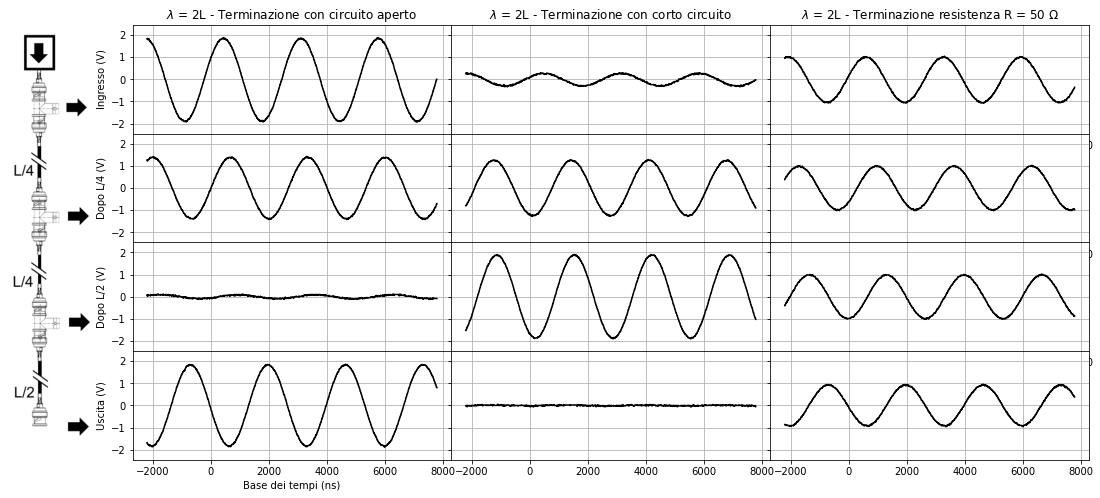

In [43]:
import cv2
im = cv2.imread(f'{OUTPUTDIR}/graphics/tl1.png')
fig3 = plt.figure(figsize = (20,8), constrained_layout=True)
gs = fig3.add_gridspec(4, 4, width_ratios=[3, 6, 6, 6])
f3_ax1 = fig3.add_subplot(gs[:, 0])
f3_ax1.imshow(im)
f3_ax1.axis("off")

#.......................... CIRCUITO APERTO
f3_ax2 = fig3.add_subplot(gs[0, 1], title = "$\lambda$ = 2L - Terminazione con circuito aperto")
f3_ax2.plot(DL_2L_open_in_t, DL_2L_open_in_s, color = "black")
f3_ax2.set_ylim(-2.45, 2.45)
f3_ax2.grid()
f3_ax2.set_ylabel("Ingresso (V)")
#PLOT INPUT

f3_ax3 = fig3.add_subplot(gs[1, 1], sharex = f3_ax2)
f3_ax3.plot(DL_2L_open_quarter_t, DL_2L_open_quarter_s, color = "black")
f3_ax3.set_ylim(-2.45, 2.45)
f3_ax3.grid()
f3_ax3.set_ylabel("Dopo L/4 (V)")
#PLOT L/4

f3_ax4 = fig3.add_subplot(gs[2, 1], sharex = f3_ax2)
f3_ax4.plot(DL_2L_open_half_t, DL_2L_open_half_s, color = "black")
f3_ax4.set_ylim(-2.45, 2.45)
f3_ax4.grid()
f3_ax4.set_ylabel("Dopo L/2 (V)")
#PLOT L/2

f3_ax5 = fig3.add_subplot(gs[3, 1], sharex = f3_ax2)
f3_ax5.plot(DL_2L_open_out_t, DL_2L_open_out_s, color = "black")
f3_ax5.set_ylim(-2.45, 2.45)
f3_ax5.grid()
f3_ax5.set_ylabel("Uscita (V)")
#PLOT L

f3_ax2.get_shared_x_axes().join(f3_ax4, f3_ax2, f3_ax3, f3_ax5)
plt.subplots_adjust(hspace=.0)

#................................ CORTO CIRCUITO

f3_ax2b = fig3.add_subplot(gs[0, 2], title = "$\lambda$ = 2L - Terminazione con corto circuito")
f3_ax2b.plot(DL_2L_shorted_in_t, DL_2L_shorted_in_s, color = "black")
f3_ax2b.set_ylim(-2.45, 2.45)
f3_ax2b.grid()

#PLOT INPUT

f3_ax3b = fig3.add_subplot(gs[1, 2], sharex = f3_ax2b)
f3_ax3b.plot(DL_2L_shorted_quarter_t, DL_2L_shorted_quarter_s, color = "black")
f3_ax3b.set_ylim(-2.45, 2.45)
f3_ax3b.grid()
#PLOT L/4

f3_ax4b = fig3.add_subplot(gs[2, 2], sharex = f3_ax2b)
f3_ax4b.plot(DL_2L_shorted_half_t, DL_2L_shorted_half_s, color = "black")
f3_ax4b.set_ylim(-2.45, 2.45)
f3_ax4b.grid()
#PLOT L/2

f3_ax5b = fig3.add_subplot(gs[3, 2], sharex = f3_ax2b)
f3_ax5b.plot(DL_2L_shorted_out_t, DL_2L_shorted_out_s, color = "black")
f3_ax5b.set_ylim(-2.45, 2.45)
f3_ax5b.grid()
#PLOT L

f3_ax2b.get_shared_x_axes().join(f3_ax4b, f3_ax2b, f3_ax3b, f3_ax5b)
plt.subplots_adjust(hspace=.0)

#................................ CIRCUITO ADATTATO

f3_ax2c = fig3.add_subplot(gs[0, 3], title = "$\lambda$ = 2L - Terminazione resistenza R = 50 $\Omega$")
f3_ax2c.plot(DL_2L_matched_in_t, DL_2L_matched_in_s, color = "black")
f3_ax2c.set_ylim(-2.45, 2.45)
f3_ax2c.grid()
#PLOT INPUT

f3_ax3c = fig3.add_subplot(gs[1, 3], sharex = f3_ax2b)
f3_ax3c.plot(DL_2L_matched_quarter_t, DL_2L_matched_quarter_s, color = "black")
f3_ax3c.set_ylim(-2.45, 2.45)
f3_ax3c.grid()
#PLOT L/4

f3_ax4c = fig3.add_subplot(gs[2, 3], sharex = f3_ax2b)
f3_ax4c.plot(DL_2L_matched_half_t, DL_2L_matched_half_s, color = "black")
f3_ax4c.set_ylim(-2.45, 2.45)
f3_ax4c.grid()
#PLOT L/2

f3_ax5c = fig3.add_subplot(gs[3, 3], sharex = f3_ax2b)
f3_ax5c.plot(DL_2L_matched_out_t, DL_2L_matched_out_s, color = "black")
f3_ax5c.set_ylim(-2.45, 2.45)
f3_ax5c.grid()
#PLOT L

f3_ax2b.get_shared_x_axes().join(f3_ax4b, f3_ax2b, f3_ax3b, f3_ax5b)
f3_ax2c.get_shared_x_axes().join(f3_ax4c, f3_ax2c, f3_ax3c, f3_ax5c)
plt.subplots_adjust(hspace=.0, wspace=0.)

yticks = f3_ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax3.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax4.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax5.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax2b.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax3b.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax4b.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax5b.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax2c.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax3c.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax4c.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax5c.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

f3_ax2c.axes.get_yaxis().set_ticklabels([])
f3_ax3c.axes.get_yaxis().set_ticklabels([])
f3_ax4c.axes.get_yaxis().set_ticklabels([])
f3_ax5c.axes.get_yaxis().set_ticklabels([])

f3_ax2b.axes.get_yaxis().set_ticklabels([])
f3_ax3b.axes.get_yaxis().set_ticklabels([])
f3_ax4b.axes.get_yaxis().set_ticklabels([])
f3_ax5b.axes.get_yaxis().set_ticklabels([])

f3_ax5.set_xlabel("Base dei tempi (ns)")

### Sine: $\lambda = L$ - Open end

In [44]:
DL_L_open_half    = openTek(f'{DATADIR}/11-10-21/DL_L_open_half/F0024CH2.CSV')
DL_L_open_out     = openTek(f'{DATADIR}/11-10-21/DL_L_open_out/F0023CH2.CSV')
DL_L_open_quarter = openTek(f'{DATADIR}/11-10-21/DL_L_open_quarter/F0025CH2.CSV')
DL_L_open_in      = openTek(f'{DATADIR}/11-10-21/DL_L_open_half/F0024CH1.CSV')

DL_L_open_half_t    = DL_L_open_half['Data'].to_numpy().transpose()[0] * 10e9
DL_L_open_half_s    = DL_L_open_half['Data'].to_numpy().transpose()[1]
DL_L_open_out_t     = DL_L_open_out['Data'].to_numpy().transpose()[0] * 10e9
DL_L_open_out_s     = DL_L_open_out['Data'].to_numpy().transpose()[1]
DL_L_open_quarter_t = DL_L_open_quarter['Data'].to_numpy().transpose()[0] * 10e9
DL_L_open_quarter_s = DL_L_open_quarter['Data'].to_numpy().transpose()[1]
DL_L_open_in_t      = DL_L_open_in['Data'].to_numpy().transpose()[0] * 10e9
DL_L_open_in_s      = DL_L_open_in['Data'].to_numpy().transpose()[1]

### Sine: $\lambda = L$ - Shorted end

In [45]:
DL_L_shorted_half    = openTek(f'{DATADIR}/11-10-21/DL_L_shorted_half/F0021CH2.CSV')
DL_L_shorted_out     = openTek(f'{DATADIR}/11-10-21/DL_L_shorted_out/F0022CH2.CSV')
DL_L_shorted_quarter = openTek(f'{DATADIR}/11-10-21/DL_L_shorted_quarter/F0020CH2.CSV')
DL_L_shorted_in      = openTek(f'{DATADIR}/11-10-21/DL_L_shorted_half/F0021CH1.CSV')

DL_L_shorted_half_t    = DL_L_shorted_half['Data'].to_numpy().transpose()[0] * 10e9
DL_L_shorted_half_s    = DL_L_shorted_half['Data'].to_numpy().transpose()[1]
DL_L_shorted_out_t     = DL_L_shorted_out['Data'].to_numpy().transpose()[0] * 10e9
DL_L_shorted_out_s     = DL_L_shorted_out['Data'].to_numpy().transpose()[1]
DL_L_shorted_quarter_t = DL_L_shorted_quarter['Data'].to_numpy().transpose()[0] * 10e9
DL_L_shorted_quarter_s = DL_L_shorted_quarter['Data'].to_numpy().transpose()[1]
DL_L_shorted_in_t      = DL_L_shorted_in['Data'].to_numpy().transpose()[0] * 10e9
DL_L_shorted_in_s      = DL_L_shorted_in['Data'].to_numpy().transpose()[1]

### Sine: $\lambda = L$ - Matched end

In [46]:
DL_L_matched_half    = openTek(f'{DATADIR}/11-10-21/DL_L_matched_half/F0018CH2.CSV')
DL_L_matched_out     = openTek(f'{DATADIR}/11-10-21/DL_L_matched_out/F0017CH2.CSV')
DL_L_matched_quarter = openTek(f'{DATADIR}/11-10-21/DL_L_matched_quarter/F0019CH2.CSV')
DL_L_matched_in      = openTek(f'{DATADIR}/11-10-21/DL_L_matched_half/F0018CH1.CSV')

DL_L_matched_half_t    = DL_L_matched_half['Data'].to_numpy().transpose()[0] * 10e9
DL_L_matched_half_s    = DL_L_matched_half['Data'].to_numpy().transpose()[1]
DL_L_matched_out_t     = DL_L_matched_out['Data'].to_numpy().transpose()[0] * 10e9
DL_L_matched_out_s     = DL_L_matched_out['Data'].to_numpy().transpose()[1]
DL_L_matched_quarter_t = DL_L_matched_quarter['Data'].to_numpy().transpose()[0] * 10e9
DL_L_matched_quarter_s = DL_L_matched_quarter['Data'].to_numpy().transpose()[1]
DL_L_matched_in_t      = DL_L_matched_in['Data'].to_numpy().transpose()[0] * 10e9
DL_L_matched_in_s      = DL_L_matched_in['Data'].to_numpy().transpose()[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


Text(0.5, 0, 'Base dei tempi (ns)')

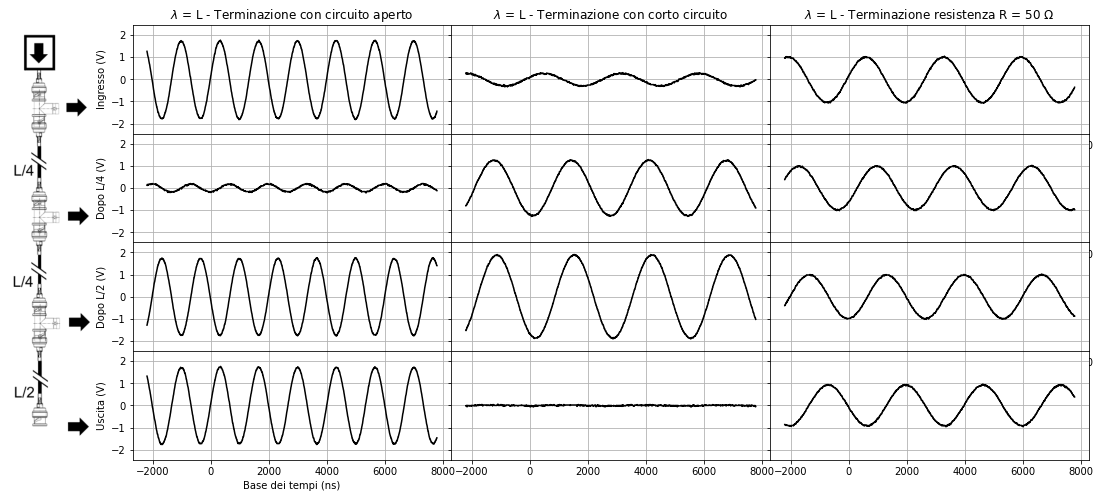

In [48]:
import cv2
im = cv2.imread(f'{OUTPUTDIR}/graphics/tl1.png')
fig3 = plt.figure(figsize = (20,8), constrained_layout=True)
gs = fig3.add_gridspec(4, 4, width_ratios=[3, 6, 6, 6])
f3_ax1 = fig3.add_subplot(gs[:, 0])
f3_ax1.imshow(im)
f3_ax1.axis("off")

#.......................... CIRCUITO APERTO
f3_ax2 = fig3.add_subplot(gs[0, 1], title = "$\lambda$ = L - Terminazione con circuito aperto")
f3_ax2.plot(DL_L_open_in_t, DL_L_open_in_s, color = "black")
f3_ax2.set_ylim(-2.45, 2.45)
f3_ax2.grid()
f3_ax2.set_ylabel("Ingresso (V)")
#PLOT INPUT

f3_ax3 = fig3.add_subplot(gs[1, 1], sharex = f3_ax2)
f3_ax3.plot(DL_L_open_quarter_t, DL_L_open_quarter_s, color = "black")
f3_ax3.set_ylim(-2.45, 2.45)
f3_ax3.grid()
f3_ax3.set_ylabel("Dopo L/4 (V)")
#PLOT L/4

f3_ax4 = fig3.add_subplot(gs[2, 1], sharex = f3_ax2)
f3_ax4.plot(DL_L_open_half_t, DL_L_open_half_s, color = "black")
f3_ax4.set_ylim(-2.45, 2.45)
f3_ax4.grid()
f3_ax4.set_ylabel("Dopo L/2 (V)")
#PLOT L/2

f3_ax5 = fig3.add_subplot(gs[3, 1], sharex = f3_ax2)
f3_ax5.plot(DL_L_open_out_t, DL_L_open_out_s, color = "black")
f3_ax5.set_ylim(-2.45, 2.45)
f3_ax5.grid()
f3_ax5.set_ylabel("Uscita (V)")
#PLOT L

f3_ax2.get_shared_x_axes().join(f3_ax4, f3_ax2, f3_ax3, f3_ax5)
plt.subplots_adjust(hspace=.0)

#................................ CORTO CIRCUITO

f3_ax2b = fig3.add_subplot(gs[0, 2], title = "$\lambda$ = L - Terminazione con corto circuito")
f3_ax2b.plot(DL_2L_shorted_in_t, DL_2L_shorted_in_s, color = "black")
f3_ax2b.set_ylim(-2.45, 2.45)
f3_ax2b.grid()

#PLOT INPUT

f3_ax3b = fig3.add_subplot(gs[1, 2], sharex = f3_ax2b)
f3_ax3b.plot(DL_2L_shorted_quarter_t, DL_2L_shorted_quarter_s, color = "black")
f3_ax3b.set_ylim(-2.45, 2.45)
f3_ax3b.grid()
#PLOT L/4

f3_ax4b = fig3.add_subplot(gs[2, 2], sharex = f3_ax2b)
f3_ax4b.plot(DL_2L_shorted_half_t, DL_2L_shorted_half_s, color = "black")
f3_ax4b.set_ylim(-2.45, 2.45)
f3_ax4b.grid()
#PLOT L/2

f3_ax5b = fig3.add_subplot(gs[3, 2], sharex = f3_ax2b)
f3_ax5b.plot(DL_2L_shorted_out_t, DL_2L_shorted_out_s, color = "black")
f3_ax5b.set_ylim(-2.45, 2.45)
f3_ax5b.grid()
#PLOT L

f3_ax2b.get_shared_x_axes().join(f3_ax4b, f3_ax2b, f3_ax3b, f3_ax5b)
plt.subplots_adjust(hspace=.0)

#................................ CIRCUITO ADATTATO

f3_ax2c = fig3.add_subplot(gs[0, 3], title = "$\lambda$ = L - Terminazione resistenza R = 50 $\Omega$")
f3_ax2c.plot(DL_2L_matched_in_t, DL_2L_matched_in_s, color = "black")
f3_ax2c.set_ylim(-2.45, 2.45)
f3_ax2c.grid()
#PLOT INPUT

f3_ax3c = fig3.add_subplot(gs[1, 3], sharex = f3_ax2b)
f3_ax3c.plot(DL_2L_matched_quarter_t, DL_2L_matched_quarter_s, color = "black")
f3_ax3c.set_ylim(-2.45, 2.45)
f3_ax3c.grid()
#PLOT L/4

f3_ax4c = fig3.add_subplot(gs[2, 3], sharex = f3_ax2b)
f3_ax4c.plot(DL_2L_matched_half_t, DL_2L_matched_half_s, color = "black")
f3_ax4c.set_ylim(-2.45, 2.45)
f3_ax4c.grid()
#PLOT L/2

f3_ax5c = fig3.add_subplot(gs[3, 3], sharex = f3_ax2b)
f3_ax5c.plot(DL_2L_matched_out_t, DL_2L_matched_out_s, color = "black")
f3_ax5c.set_ylim(-2.45, 2.45)
f3_ax5c.grid()
#PLOT L

f3_ax2b.get_shared_x_axes().join(f3_ax4b, f3_ax2b, f3_ax3b, f3_ax5b)
f3_ax2c.get_shared_x_axes().join(f3_ax4c, f3_ax2c, f3_ax3c, f3_ax5c)
plt.subplots_adjust(hspace=.0, wspace=0.)

yticks = f3_ax2.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax3.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax4.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax5.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax2b.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax3b.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax4b.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax5b.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax2c.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax3c.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax4c.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
yticks = f3_ax5c.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

f3_ax2c.axes.get_yaxis().set_ticklabels([])
f3_ax3c.axes.get_yaxis().set_ticklabels([])
f3_ax4c.axes.get_yaxis().set_ticklabels([])
f3_ax5c.axes.get_yaxis().set_ticklabels([])

f3_ax2b.axes.get_yaxis().set_ticklabels([])
f3_ax3b.axes.get_yaxis().set_ticklabels([])
f3_ax4b.axes.get_yaxis().set_ticklabels([])
f3_ax5b.axes.get_yaxis().set_ticklabels([])

f3_ax5.set_xlabel("Base dei tempi (ns)")

## Commit changes

In [ ]:
%cd /content/Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "Plots from data analysis"
!git push 